## ECE 143 INDIVIDUAL PROJECT

Name: Yancong Deng

PID: A10971125




Please Enter region's width: 6
Please Enter region's length: 6
region area = 36
total area = 31.0


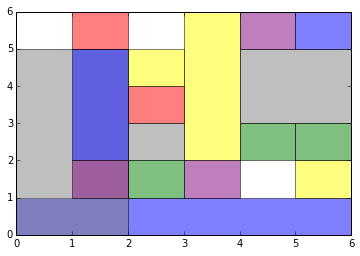

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import numpy as np
import random

def user_input():
    '''
    ask user to enter region's width and length
    >>region_width = interger
    >>region_length = interger
    >>recursively call user_input() when input is not interger
    '''  
    region_width=0
    region_length=0
    try:
        region_width = input("Please Enter region's width: ")
        assert isinstance(region_width, int)
        assert region_width>0
        region_length = input("Please Enter region's length: ")
        assert isinstance(region_length, int)
        assert region_length>0
        return region_width,region_length
    except: 
        print "Please Enter interger > 0"
        return user_input()

def generate_region(region_width,region_length):
    '''
    draw retangle region based on user input region_width and region_length
    set initial tower located at origin (0,0) with random width and length
    Note: Tower must completely within the defined region
    otherwise, need to regenerate width and length
    
    Function input:
    >>region_width
    >>region_length
    
    Plot: shown retangle region and output initail retangle tower.
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    
    plt.figure()
    plt.xlim(0, region_width)
    plt.ylim(0, region_length)
    #plt.gca().add_patch(patches.Rectangle((0, 0),0.5,0.5,color='yellow'))
    #initial origin = [0,0]
    origin = np.array([0,0])
    #initial dimension
    region = np.zeros((region_width,region_length))
    dim = generate_tower_dimension(origin,region_width,region_length)
    region[0:dim[0],0:dim[1]] = 1
    region_area = region_width * region_length
    return origin,dim, region,region_area
    #plt.gca().add_patch(patches.Rectangle((init_origin[0], init_origin[1]),init_dim[0],init_dim[1],facecolor="blue", alpha=0.5))


def generate_tower_origin(region_width,region_length):
    '''
    generate new tower origin
    return numpy object
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    origin_x = random.randrange(1, region_width, 1)
    origin_y = random.randrange(1, region_length, 1)
    return np.array([origin_x,origin_y])

def generate_tower_dimension(origin, region_width,region_length):
    '''
    generate new tower dimension
    return numpy object
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    assert type(origin).__module__ == "numpy"
    tower_width = random.randrange(1, region_width+1-origin[0], 1)
    tower_length = random.randrange(1, region_length+1-origin[1], 1)
    return np.array([tower_width,tower_length])

def generate_tower(region_width,region_length):
    '''
    generate new tower origin and dimension
    return numpy object
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    origin= generate_tower_origin(region_width,region_length)
    tower_retangle = generate_tower_dimension(origin, region_width,region_length)
    return origin,tower_retangle
    
def plot_tower(origin,dim):
    '''
    plot tower retangle
    input: np array of all origin and corresponding dimension
    '''
    assert type(origin).__module__ == "numpy"
    assert type(dim).__module__ == "numpy"
    #assert isinstance(origin, list)
    #assert isinstance(dim, list)
    color_map = [ 'blue','yellow', 'grey', 'green', 'purple','red']
    if len(origin.shape)==1:
        x=len(origin.shape)
        plt.gca().add_patch(patches.Rectangle((origin[0],origin[1]),dim[0],dim[1],facecolor="blue", alpha=0.5))
    elif len(origin.shape)>1:
        x = origin.shape[0]
        color_ind = 0
        for i in range(x):
            if color_ind > 5:
                color_ind = 0
            plt.gca().add_patch(patches.Rectangle((origin[i][0],origin[i][1]),dim[i][0],dim[i][1],facecolor=color_map[color_ind], alpha=0.5))
            color_ind += 1
        #plt.gca().add_patch(patches.Rectangle((origin[0], origin[1]),tower_retangle[0],tower_retangle[1],facecolor="yellow",alpha=0.5))

        
def trim_retangle(region_width,region_length,origin,dim,region):
    '''
    takes new generated origin and dimension
    to obtain trimed retangle
    returns: new origin 
            new dimention
            new region map
            area
            
    '''
    assert type(origin).__module__ == "numpy"
    assert type(dim).__module__ == "numpy"
    assert type(region).__module__ == "numpy"
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    area = 0
    add_origin = 0
    new_region = np.zeros((region_width,region_length))
    new_region[origin[0]:origin[0]+dim[0],origin[1]:origin[1]+dim[1]] = 1
    temp_region = region + new_region
    #print np.rot90(region)
    #print np.rot90(new_region)
    #print "temp_region"
    #print np.rot90(temp_region)
    overlap_x, overlap_y = np.where(temp_region == 2)
    #print "overlap_x & overlap_y"
    #print overlap_x
    #print overlap_y
    if overlap_x.shape[0] == 0:
        region = temp_region
        area = np.sum(region)
        add_origin = 1
        return region,origin,dim, area,add_origin
    else:
        for i in range(overlap_x.shape[0]):
            if i == 0:
                overlap_pnt = np.array([overlap_y[i],overlap_x[i]]) 
            else:
                overlap_pnt = np.vstack((overlap_pnt,np.array([overlap_y[i],overlap_x[i]]))) 
        #print "overlap_pnt"
        #print overlap_pnt
        for i in range(0,dim[0],1):
            for j in range(0,dim[1],1):
                if i == 0 and j == 0:
                    tower_pnt = np.array([origin[1],origin[0]])
                else:
                    tower_pnt = np.vstack((tower_pnt,np.array([origin[1]+j,origin[0]+i]))) 
        #print "tower_pnt"
        #print tower_pnt
        if np.array_equal(tower_pnt,overlap_pnt):
            area = np.sum(region)
            origin = np.array([0,0])
            dim = np.array([0,0])
            return region,origin,dim, area,add_origin
        else:
            trim_region = new_region
            for i in range(overlap_x.shape[0]):
                trim_region[overlap_x[i]][overlap_y[i]] = 0
            #print np.rot90(trim_region)
            temp_x,temp_y = np.where(trim_region==1)
            #print "temp_x,temp_y"
            #print temp_x
            #print temp_y
            if temp_x.shape[0] == 1:
                origin = np.array([temp_x[0],temp_y[0]])
                dim = np.array([1,1])
                region = trim_region + region
                add_origin = 1
                return region,origin,dim, area,add_origin
            elif temp_x.shape[0] == 2:
                origin = np.array([temp_x[0],temp_y[0]])
                if temp_x[0]==temp_x[1]:
                    dim = np.array([2,1])
                elif temp_y[0]==temp_y[1]:
                    dim = np.array([1,2])
                else :
                    dim = np.array([1,1])
                dim = np.array([1,1])
                region = trim_region + region
                add_origin = 1
                return region,origin,dim, area,add_origin
            else:
                temp_area = 0
                max_area = 1
                temp_ori = np.array([0,0])
                temp_dim = np.array([0,0])
                add_origin=1
                max_width = 1
                max_length=1
                temp_x1 = 0
                temp_y1 =0
                for i in range(temp_x.shape[0]):
                    for m in range(temp_x[i],region_width):
                        if trim_region[m][temp_y[i]] == 0:
                            max_width = m-temp_x[i]-1
                            temp_x1 = m
                            break
                    for m in range(temp_y[i],region_length):
                        if trim_region[temp_x[i]][m] == 0:
                            max_length = m-temp_y[i]-1
                            temp_y1 = m
                            break  
                    temp_area = max_width*max_length
                    if temp_area > max_area:
                        temp_ori[0] = temp_x1
                        temp_ori[1] = temp_y1
                        temp_dim[0] = max_width
                        temp_dim[1] = max_length                    
                        max_area = temp_area
                origin = temp_ori
                add_new_region = np.zeros((region_width,region_length))
                add_new_region[temp_ori[0]:temp_ori[0]+temp_dim[0],temp_ori[1]:temp_ori[1]+temp_dim[1]] = 1
                region = region + add_new_region
                area = np.sum(region) 
                return region,origin,dim, area, add_origin
    return region,origin,dim, area, add_origin
    
########################################################################################################    
region_width,region_length = user_input()
init_origin,init_dim,region,region_area = generate_region(region_width,region_length)
origin =init_origin
dim =init_dim
area = 0
#plot_tower(origin,dim)
cnt = 0
while True:
    tower_origin,tower_retangle = generate_tower(region_width,region_length)
    #print "tower_origin & tower_retangle"
    #print tower_origin
    #print tower_retangle
    region,trim_origin,trim_dim,area,add_origin = trim_retangle(region_width,region_length,tower_origin,tower_retangle,region)

    if add_origin!=0:
        origin = np.vstack((origin,trim_origin))
        dim = np.vstack((dim,trim_dim))
    cnt+=1
    if area > region_area or cnt > 20000:
        print "region area = " + str(region_area)
        print "total area = "+ str(area)
        break
#print tower_origin
plot_tower(origin,dim)
plt.show()



## discussion

The project will first ask user to enter a dimension for width and length:
Note: user can only enter interger number, otherwise warning will be send and ask user to re-enter.

Then, the program will generate the corresponding region using matplotlib plot.
the program will first generate a initial retangle with lower left hand corner at the origin, the dimension of the initial retangle is random, used random.randrange() function to generate any random function in this program. When the first initial retangle is generated, it also generate a numpy object called region, whith indicate the corresponding retangle in a matrix for with indicator 1. The empty area will remain 0.

Then, the program will randomly generate retangle tower with random origin and random dimention. The progrma will ensure the new generated origin and dimention must remain inside the user created region. When each tower is generated, the program will also generate a new_region numpy array and add to the original region array. If there are overlaping. The added array will indicate as 2. Therefore, we can eliminate the overlapping situation. 

After finding all the overlapping point, the program will subtract the overlapping point to the new_region numpy array. In this case, we will have a array subject contains 1 with out any overlapping. The next step is to find the maximum retangle in this new new_region numpy array. Using np.where(), we can locate all the index of the none overlapping points.
Then used brute fore method to find the maximum retangle. THe brute fore method is to go though all possible point and look for maximum area retangle. Once the retangle is found, record its corresponding lower-left-hand-corner point, in program called origin, and its corresponding width and length. If the new generated tower is completely overlap, the program will ignore the tower and move on to next.

The program collects all the origin and retangle(width, lenth) as numpy object, and used plot_tower() function to output all trimmed retangle when the program finished runing.

limitation: 

This approach can be computationally expensive, since it has to go through all possible point to look for largest area retangle. The program takes long time to complete, since we are using the random function, it is difficult to obtain ideal retangule location to fill up the region toward the end.